# Exercise 2: Implementing Logistic Regression for Classification Task on Iris dataset for Setosa (0) vs Versicolor (1) using first two features -- sepal length and sepal width

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data                # shape (150, 4): the feature matrix
print(X)
y = iris.target              # shape (150,): integer class labels (0,1,2)
print(y)
names = iris.feature_names
print(names)
mask = (y==0) | y==1
X_cl=X[mask][:,:2]
y_cl=y[mask]
print(X_cl)
print(y_cl)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

mask = (y == 0) | (y == 1) # keep only classes 0 and 1 This creates a boolean array the same length as y.

For each sample:

True if the flower belongs to class 0 (Setosa) or 1 (Versicolor).

False if the flower is class 2 (Virginica).

Example: If y = [0, 0, 1, 2, 2, 1, 0] then mask = [True, True, True, False, False, True, True].

👉 Applying this mask filters the dataset to only Setosa vs Versicolor, making it a binary classification problem (2 classes only).

🌸 3) Why we took only first two columns? python Copy code X_cl = X[mask][:, :2] # use first two features X originally has 4 features per flower:

sepal length (cm)

sepal width (cm)

petal length (cm)

petal width (cm)

[:, :2] → select only first two columns (sepal length and sepal width).

In [3]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_cl_s = scaler.fit_transform(X_train_cl)  # fit scaler on train only
X_test_cl_s = scaler.transform(X_test_cl)        # apply same transform to test


fit_transform: fit = compute mean and std (from training set only). transform = apply scaling using those values. transform: Applies the same scaling (same mean & std) to test data. ⚠️ If you fit on the whole dataset (train + test), you would be leaking information from the test set into training → this is called data leakage.

In [4]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_cl_s, y_train_cl)
y_pred_cl = clf.predict(X_test_cl_s)

print("Logistic Regression (Setosa vs Versicolor):")
print(classification_report(y_test_cl, y_pred_cl))

Logistic Regression (Setosa vs Versicolor):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Class 0 (Setosa)

Precision = 1.00 → Of all the samples predicted as Setosa, 100% were actually Setosa.

Recall = 1.00 → Of all the true Setosa samples, 100% were correctly identified.

F1-score = 1.00 → The harmonic mean of precision & recall is also perfect.

Support = 10 → There were 10 Setosa samples in the test set.

Class 1 (Versicolor)

Same as above, also perfect scores with support = 10.

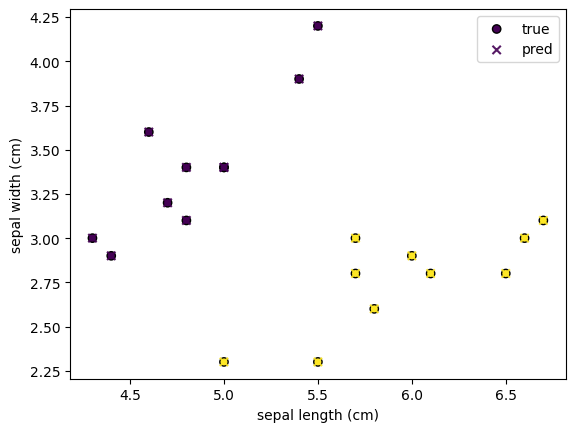

In [5]:
plt.scatter(X_test_cl[:, 0], X_test_cl[:, 1], c=y_test_cl, marker='o', label='true', edgecolors='k')
plt.scatter(X_test_cl[:, 0], X_test_cl[:, 1], c=y_pred_cl, marker='x', label='pred', alpha=0.9)
plt.xlabel(names[0])
plt.ylabel(names[1])
plt.legend()
plt.show()